In [1]:
# basic database processing
import numpy as np
import pandas as pd
import xlrd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# model evulation metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_auc_score, roc_curve, precision_recall_curve, auc)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# upload the dataset 
default = pd.read_excel("default of credit card clients.xls", engine='xlrd')
default.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
# view data information
default.info()
default.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,30000,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [4]:
# delete missing values
default = default.dropna()

# rename the columns
default.rename(columns = {'X1':'credit_limit', 'X2':'gender', 'X3':'education_level', 'X4':'marital_status', 'X5':'age', 'X6':'repayment_status200509', 
                          'X7':'repayment_status200508', 'X8':'repayment_status200507', 'X9':'repayment_status200506', 'X10':'repayment_status200505',
                          'X11':'repayment_status200504', 'X12':'bill_statement200509', 'X13':'bill_statement200508', 'X14':'bill_statement200507',
                          'X15':'bill_statement200506', 'X16':'bill_statement200505', 'X17':'bill_statement200504', 'X18':'previous_payment200509',
                          'X19':'previous_payment200508', 'X20':'previous_payment200507', 'X21':'previous_payment200506', 'X22':'previous_payment200505',
                          'X23':'previous_payment200504','Y':'default_payment'}, inplace = True)
default.head(5)

,Unnamed: 0,credit_limit,gender,education_level,marital_status,age,repayment_status200509,repayment_status200508,repayment_status200507,repayment_status200506,...,bill_statement200506,bill_statement200505,bill_statement200504,previous_payment200509,previous_payment200508,previous_payment200507,previous_payment200506,previous_payment200505,previous_payment200504,default_payment
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
# convert object into numeric
numeric_features = [
    'credit_limit', 'gender','education_level','marital_status','age',
    'repayment_status200509', 'repayment_status200508', 'repayment_status200507',
    'repayment_status200506', 'repayment_status200505', 'repayment_status200504',
    'bill_statement200509', 'bill_statement200508', 'bill_statement200507',
    'bill_statement200506', 'bill_statement200505', 'bill_statement200504',
    'previous_payment200509', 'previous_payment200508', 'previous_payment200507',
    'previous_payment200506', 'previous_payment200505', 'previous_payment200504',
    'default_payment'
]

for col in numeric_features:
    if default[col].dtype == 'object':
       default[col] = pd.to_numeric(default[col], errors='coerce')
print(default.dtypes)

# remove the rows with unknown variables
default = default[~((default['education_level'].isin([4, 5, 6])) | (default['marital_status'] == 3))]
default.head(10)

Unnamed: 0                 object
credit_limit              float64
gender                    float64
education_level           float64
marital_status            float64
age                       float64
repayment_status200509    float64
repayment_status200508    float64
repayment_status200507    float64
repayment_status200506    float64
repayment_status200505    float64
repayment_status200504    float64
bill_statement200509      float64
bill_statement200508      float64
bill_statement200507      float64
bill_statement200506      float64
bill_statement200505      float64
bill_statement200504      float64
previous_payment200509    float64
previous_payment200508    float64
previous_payment200507    float64
previous_payment200506    float64
previous_payment200505    float64
previous_payment200504    float64
default_payment           float64
dtype: object


,Unnamed: 0,credit_limit,gender,education_level,marital_status,age,repayment_status200509,repayment_status200508,repayment_status200507,repayment_status200506,...,bill_statement200506,bill_statement200505,bill_statement200504,previous_payment200509,previous_payment200508,previous_payment200507,previous_payment200506,previous_payment200505,previous_payment200504,default_payment
0,ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
6,6,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
7,7,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
8,8,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0


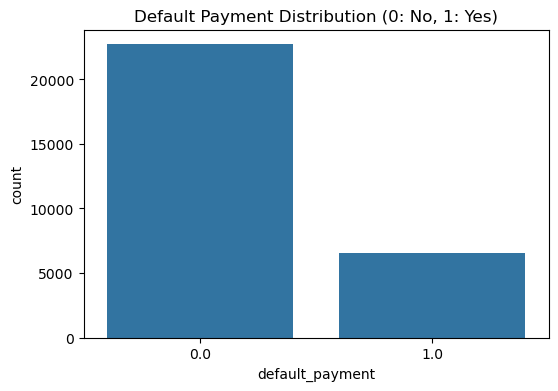

Average Default Rate:22.30%


In [6]:
# target variable analysis
plt.figure(figsize=(6,4))
sns.countplot(x='default_payment', data=default)
plt.title('Default Payment Distribution (0: No, 1: Yes)')
plt.savefig("punctual_default_payment_distribution")
plt.show()

# calculate default rate
avg_default_rate = default['default_payment'].mean()
print(f"Average Default Rate:{avg_default_rate*100:.2f}%")

Credit Limit Statistics for Non-Default Group (default_payment = 0):
count      22712.000000
mean      178734.413526
std       131920.795207
min        10000.000000
25%        70000.000000
50%       150000.000000
75%       250000.000000
max      1000000.000000
Name: credit_limit, dtype: float64


Credit Limit Statistics for Default Group (default_payment = 1):
count      6519.000000
mean     130837.195889
std      115635.382186
min       10000.000000
25%       50000.000000
50%       90000.000000
75%      200000.000000
max      740000.000000
Name: credit_limit, dtype: float64

Credit Limit Statistics Summary:
       Non-Default Group  Default Group
count       22712.000000    6519.000000
mean       178734.413526  130837.195889
std        131920.795207  115635.382186
min         10000.000000   10000.000000
25%         70000.000000   50000.000000
50%        150000.000000   90000.000000
75%        250000.000000  200000.000000
max       1000000.000000  740000.000000


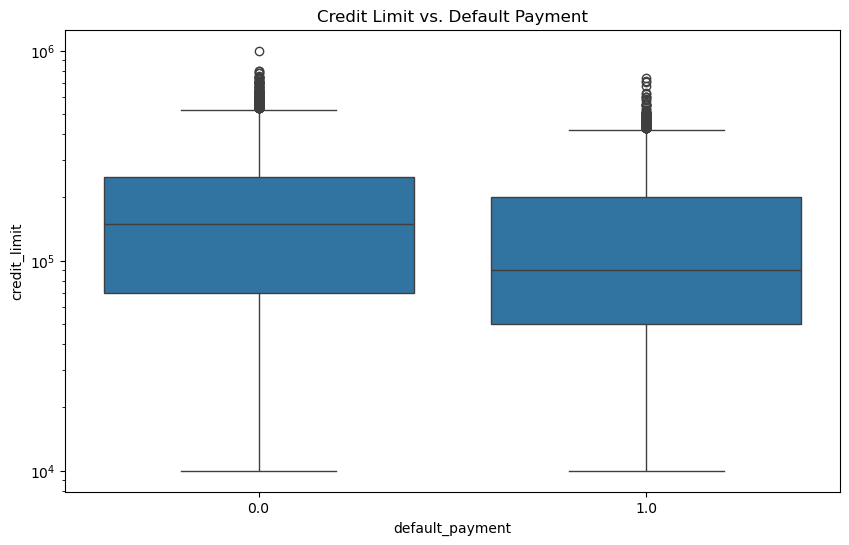

In [7]:
# calculate detailed statistics for default and non-default groups
non_default_stats = default[default['default_payment'] == 0]['credit_limit'].describe()
default_stats = default[default['default_payment'] == 1]['credit_limit'].describe()
print("Credit Limit Statistics for Non-Default Group (default_payment = 0):")
print(non_default_stats)
print("\n" + "="*50 + "\n")
print("Credit Limit Statistics for Default Group (default_payment = 1):")
print(default_stats)

# create a more detailed statistics table
stats_summary = pd.DataFrame({
    'Non-Default Group': non_default_stats,
    'Default Group': default_stats
})
print("\nCredit Limit Statistics Summary:")
print(stats_summary)

# relationship between credit limit and default payment
plt.figure(figsize=(10,6))
sns.boxplot(x='default_payment', y='credit_limit', data=default)
plt.yscale('log') 
plt.title('Credit Limit vs. Default Payment')
plt.show()

Age Statistics for Non-Default Group (default_payment = 0):
count    22712.000000
mean        35.334581
std          9.040125
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: age, dtype: float64


Age Statistics for Default Group (default_payment = 1):
count    6519.000000
mean       35.613131
std         9.650396
min        21.000000
25%        28.000000
50%        34.000000
75%        42.000000
max        75.000000
Name: age, dtype: float64

Age Statistics Summary:
       Non-Default Group  Default Group
count       22712.000000    6519.000000
mean           35.334581      35.613131
std             9.040125       9.650396
min            21.000000      21.000000
25%            28.000000      28.000000
50%            34.000000      34.000000
75%            41.000000      42.000000
max            79.000000      75.000000


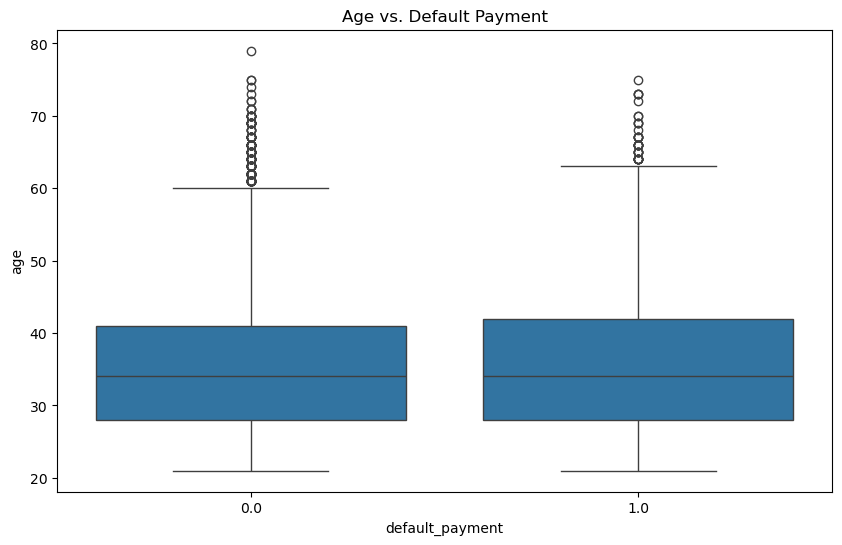

In [8]:
# calculate detailed statistics for age by default payment groups
non_default_age_stats = default[default['default_payment'] == 0]['age'].describe()
default_age_stats = default[default['default_payment'] == 1]['age'].describe()
print("Age Statistics for Non-Default Group (default_payment = 0):")
print(non_default_age_stats)
print("\n" + "="*50 + "\n")
print("Age Statistics for Default Group (default_payment = 1):")
print(default_age_stats)

# create a detailed statistics table
age_stats_summary = pd.DataFrame({
    'Non-Default Group': non_default_age_stats,
    'Default Group': default_age_stats
})
print("\nAge Statistics Summary:")
print(age_stats_summary)

# relationship between age and default payment 
plt.figure(figsize=(10,6))
sns.boxplot(x='default_payment', y='age', data=default)
plt.title('Age vs. Default Payment')
plt.show()

Education Level Distribution:
education_level
0.0       14
1.0    10535
2.0    13868
3.0     4814
Name: count, dtype: int64

Default Rate by Education Level:
education_level
0.0    0.000000
1.0    0.192027
2.0    0.236948
3.0    0.251350
Name: default_payment, dtype: float64

Education Level Summary:


,Count,Percentage,Default Rate,Default Count
education_level,,,,
0.0,14,0.05,0.00,0.0
1.0,10535,36.04,19.20,2023.0
2.0,13868,47.44,23.69,3286.0
3.0,4814,16.47,25.14,1210.0


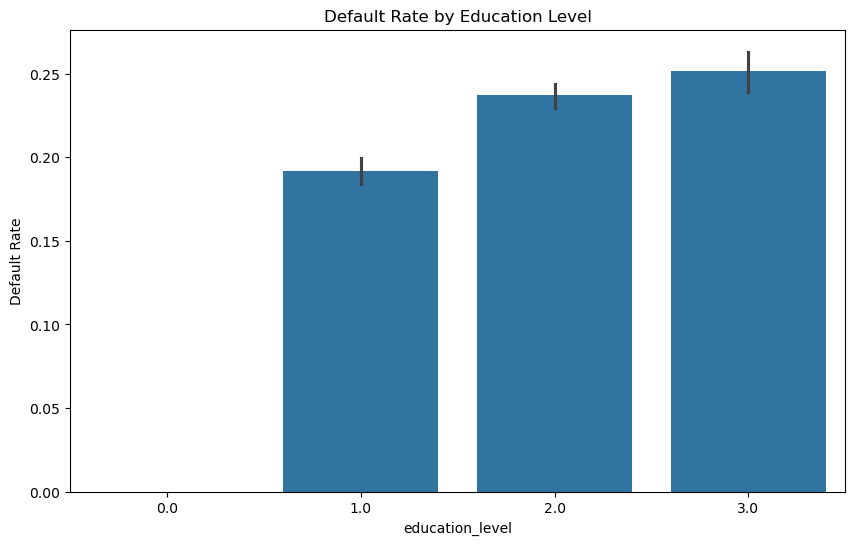

In [9]:
# calculate basic statistics
education_counts = default['education_level'].value_counts().sort_index()
education_default_rates = default.groupby('education_level')['default_payment'].mean()
print("Education Level Distribution:")
print(education_counts)
print("\nDefault Rate by Education Level:")
print(education_default_rates)

# create a detailed summary table
education_summary = pd.DataFrame({
    'Count': education_counts,
    'Percentage': (education_counts / len(default) * 100).round(2),
    'Default Rate': (education_default_rates * 100).round(2),
    'Default Count': default.groupby('education_level')['default_payment'].sum()
})
print("\nEducation Level Summary:")
display(education_summary)

# relationship between educational level and default payment
plt.figure(figsize=(10,6))
sns.barplot(x='education_level', y='default_payment', data=default, estimator=np.mean)
plt.title('Default Rate by Education Level')
plt.ylabel('Default Rate')
plt.show()

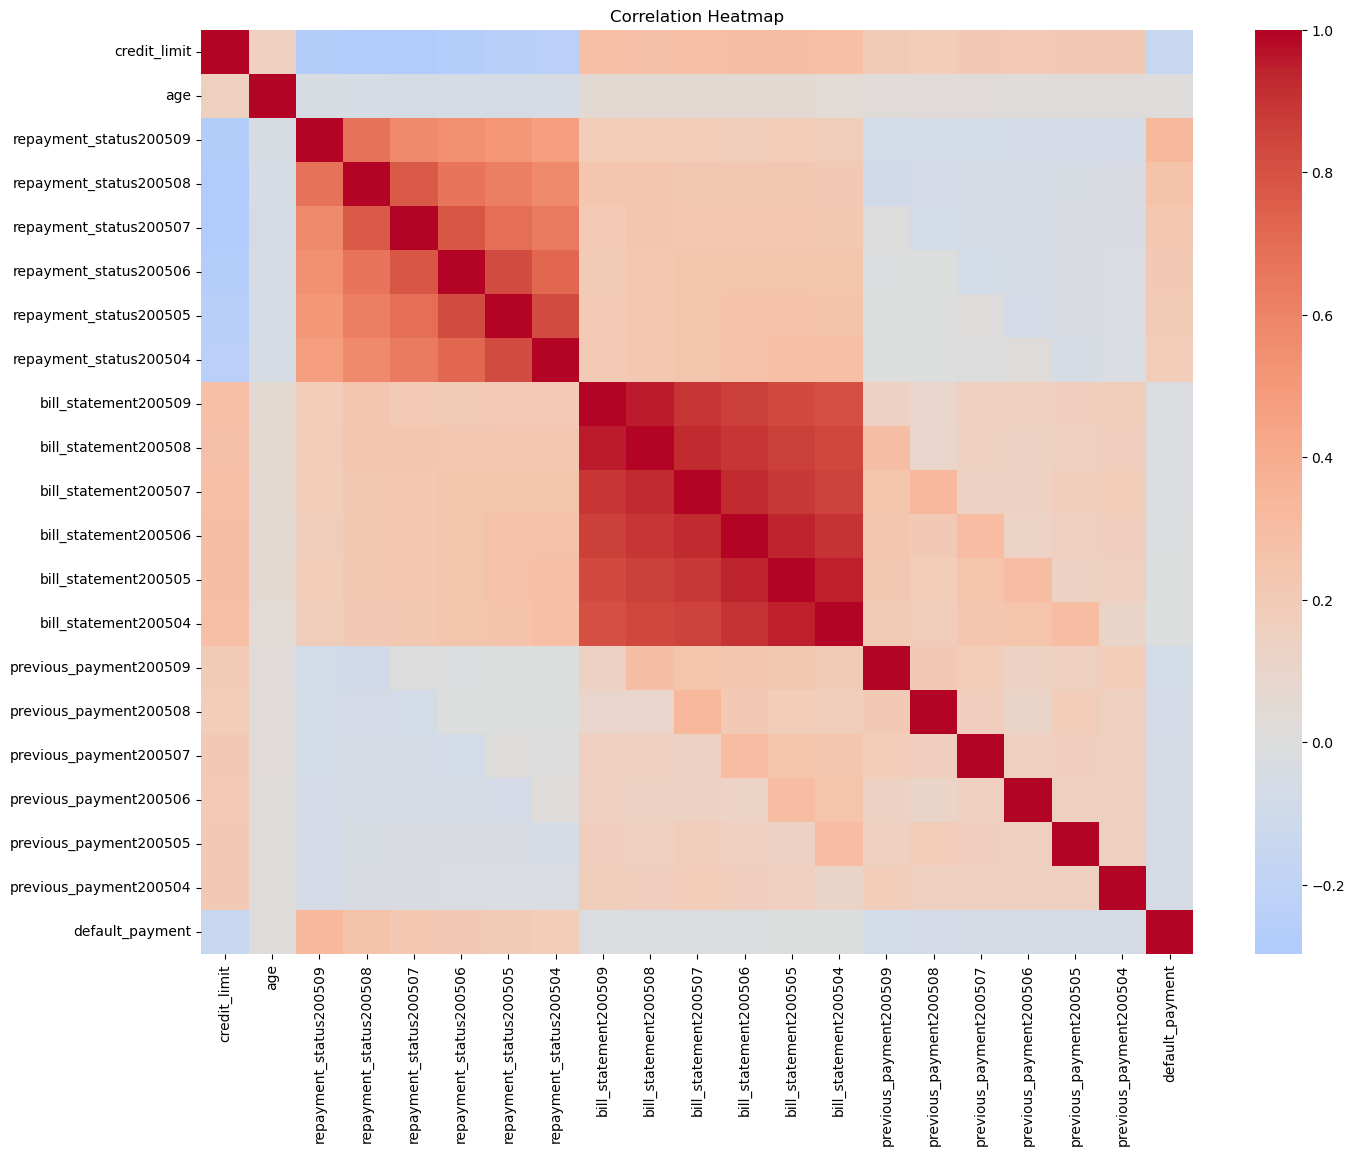

Features most correlated with Default:
default_payment           1.000000
repayment_status200509    0.326870
repayment_status200508    0.263899
repayment_status200507    0.234380
repayment_status200506    0.214539
repayment_status200505    0.203865
repayment_status200504    0.187028
age                       0.012631
bill_statement200504     -0.004468
bill_statement200505     -0.005775
bill_statement200506     -0.009193
bill_statement200507     -0.013234
bill_statement200508     -0.013315
bill_statement200509     -0.018678
previous_payment200504   -0.054229
previous_payment200505   -0.055623
previous_payment200507   -0.057359
previous_payment200506   -0.057481
previous_payment200508   -0.060480
previous_payment200509   -0.076930
credit_limit             -0.153368
Name: default_payment, dtype: float64


In [10]:
# draw correlation heatmap
plt.figure(figsize=(16,12))

# apply renamed columns 
numeric_features = [
    'credit_limit',  
    'age',           
    'repayment_status200509', 'repayment_status200508', 'repayment_status200507',  
    'repayment_status200506', 'repayment_status200505', 'repayment_status200504',  
    'bill_statement200509', 'bill_statement200508', 'bill_statement200507',        
    'bill_statement200506', 'bill_statement200505', 'bill_statement200504',        
    'previous_payment200509', 'previous_payment200508', 'previous_payment200507',  
    'previous_payment200506', 'previous_payment200505', 'previous_payment200504'   
]

# calculate correlation matrix 
correlation_matrix = default[numeric_features + ['default_payment']].corr()

# create heatmaps 
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# view the most relevant features to the target variable
correlation_with_target = correlation_matrix['default_payment'].sort_values(ascending=False)
print("Features most correlated with Default:")
print(correlation_with_target)

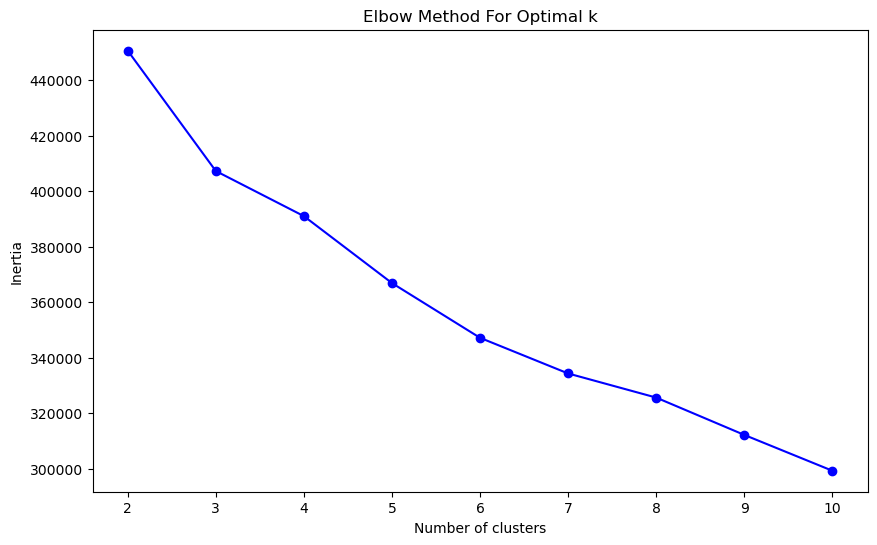

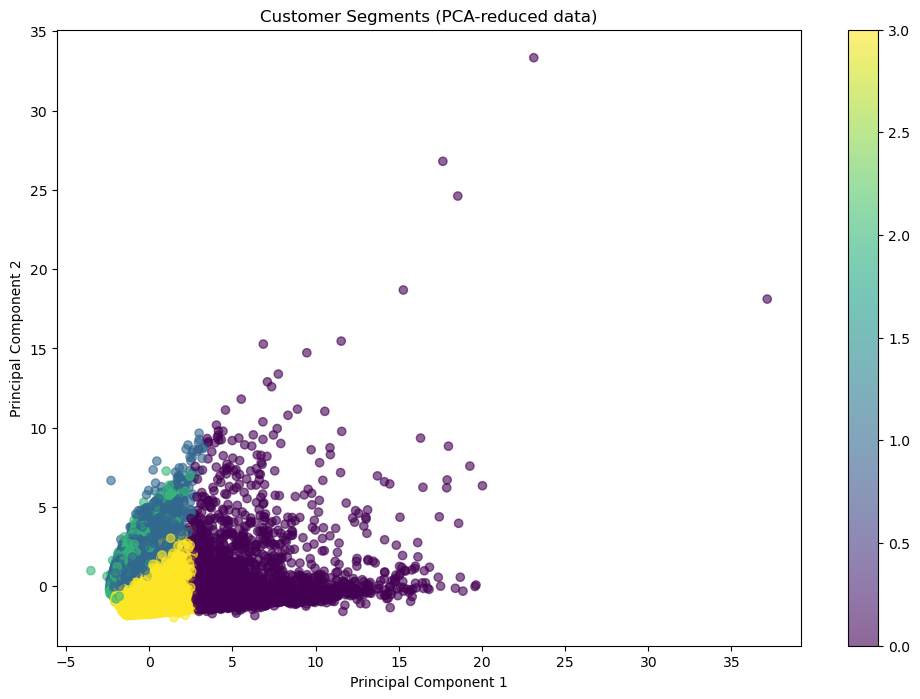

Cluster Profiles (Mean values):


,Unnamed: 0,credit_limit,gender,education_level,marital_status,age,repayment_status200509,repayment_status200508,repayment_status200507,repayment_status200506,...,bill_statement200506,bill_statement200505,bill_statement200504,previous_payment200509,previous_payment200508,previous_payment200507,previous_payment200506,previous_payment200505,previous_payment200504,default_payment
cluster,,,,,,,,,,,,,,,,,,,,,
0,15427.103569,284554.616735,1.569631,1.728204,1.502633,36.910181,0.264482,0.234055,0.207139,0.164131,...,182009.519310,170275.004681,163655.165009,16263.705968,17357.270919,14822.188122,12804.110884,12835.739029,13279.399356,0.193973
1,14563.63767,218770.830148,1.637059,1.633389,1.495643,36.409112,-0.574377,-0.707537,-0.691026,-0.696530,...,8342.391989,8808.421189,8816.000153,5861.311726,6770.452377,6838.430974,6419.773123,5975.636906,6864.282220,0.175203
2,15421.962737,220311.738919,1.660740,1.629810,1.485387,36.751096,-0.911349,-1.579883,-1.739162,-1.876035,...,2694.539698,2698.942767,3044.439113,2960.961520,2867.535314,2520.927667,2592.911349,3035.002435,3358.901607,0.203848
3,14930.803969,105773.176843,1.580707,1.940525,1.576355,34.252275,0.405183,0.428327,0.407161,0.350059,...,37932.932942,34832.053343,33544.840630,3875.686865,3700.963471,2987.307992,2933.638995,2942.623236,3154.657721,0.255374



Default Rate by Cluster:
cluster
0    0.193973
1    0.175203
2    0.203848
3    0.255374
Name: default_payment, dtype: float64


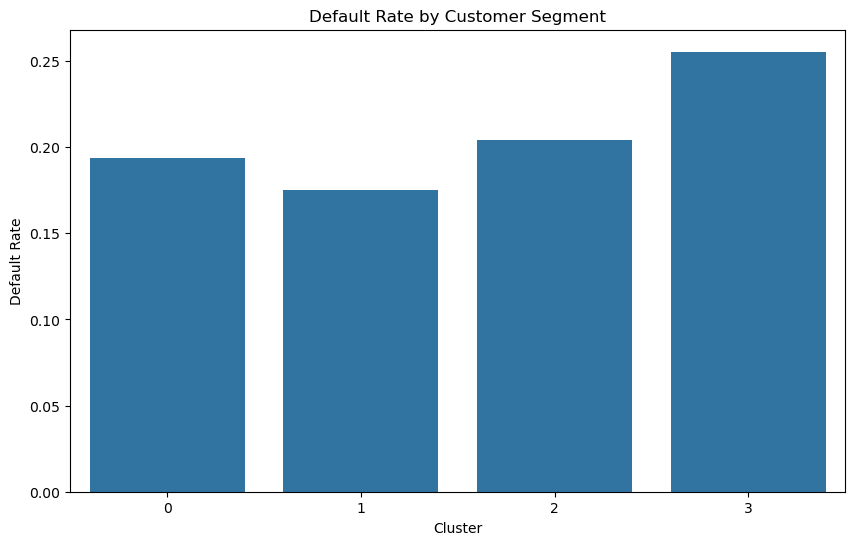

In [11]:
# extract characteristic and target variable 
default_clean = default.dropna()  
X = default_clean.drop('default_payment', axis=1)
y = default_clean['default_payment']

# split into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# create preprocessing pipeline 
numeric_features = [
    'credit_limit', 'age',
    'bill_statement200509', 'bill_statement200508', 'bill_statement200507',
    'bill_statement200506', 'bill_statement200505', 'bill_statement200504',
    'previous_payment200509', 'previous_payment200508', 'previous_payment200507',
    'previous_payment200506', 'previous_payment200505', 'previous_payment200504'
]
categorical_features = [
    'gender', 'education_level', 'marital_status',
    'repayment_status200509', 'repayment_status200508', 'repayment_status200507',
    'repayment_status200506', 'repayment_status200505', 'repayment_status200504'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
preprocessor_cluster = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ignore warning information
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '1'  
warnings.filterwarnings("ignore")

# preprocess the whole dataset 
X_full_processed = preprocessor_cluster.fit_transform(X)

# pca dimensionality reduction and clustering analysis 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full_processed.toarray())

# determine the optimal number of clusters 
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_full_processed)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# perform clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_full_processed)
default_clustered = default_clean.copy()  
default_clustered['cluster'] = cluster_labels

# visualize clustering results 
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('Customer Segments (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# analyze the characteristic of different clusters 
cluster_profiles = default_clustered.groupby('cluster').mean()
print("Cluster Profiles (Mean values):")
display(cluster_profiles)

cluster_default_rates = default_clustered.groupby('cluster')['default_payment'].mean()
print("\nDefault Rate by Cluster:")
print(cluster_default_rates)

# visualize the default rate of each cluster 
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_default_rates.index, y=cluster_default_rates.values)
plt.title('Default Rate by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Default Rate')
plt.show()

In [12]:
# create complete pipeline (pre-processing and modeling)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

# evaluate model by cross-validation 
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print(f"Average CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# train final model based on the training set 
model_pipeline.fit(X_train, y_train)

# evaluate final model based on the test set 
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# random forest 
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"\nRandom Forest CV ROC-AUC: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

Cross-Validation ROC-AUC Scores: [0.75808545 0.77486695 0.78399709 0.75329802 0.76907935]
Average CV Score: 0.7679 (+/- 0.0222)

Test Set Performance:
Accuracy: 0.7804002052334531
ROC-AUC Score: 0.7732541062971551

Confusion Matrix:
[[3817  726]
 [ 558  746]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      4543
         1.0       0.51      0.57      0.54      1304

    accuracy                           0.78      5847
   macro avg       0.69      0.71      0.70      5847
weighted avg       0.79      0.78      0.78      5847


Random Forest CV ROC-AUC: 0.7648 (+/- 0.0234)


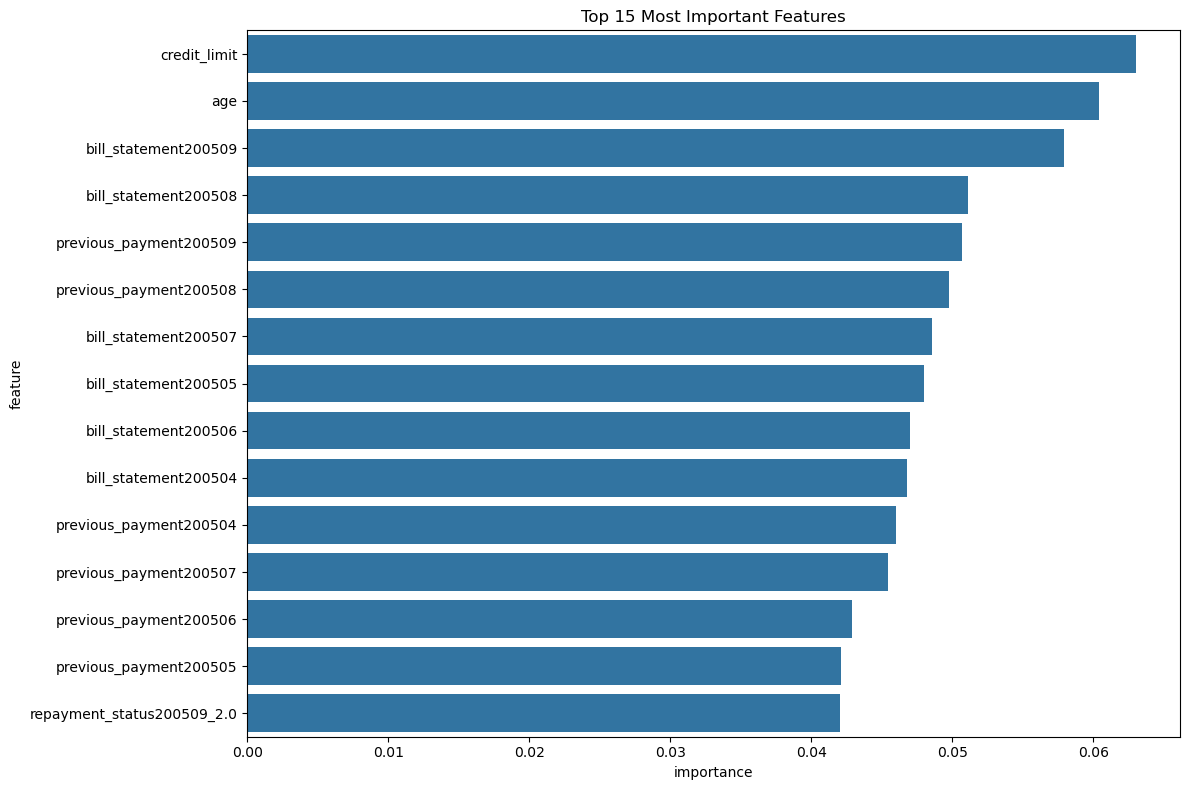

Critical Business Insights Summary:
1. Most Important Predictive Feature: credit_limit
2. High-risk Client Cluster: Cluster 3 (Default Rate: 25.54%)
3. Model Performance: ROC-AUC = 0.7733


In [13]:
# extract feature importances
rf_pipeline.fit(X_train, y_train)
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# obtain feature names 
feature_names = numeric_features + list(
    rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
    .named_steps['onehot'].get_feature_names_out(categorical_features)
)

# create dataframe 
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# visualize most important features 
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

# summarize business insights 
print("Critical Business Insights Summary:")
print("1. Most Important Predictive Feature:", importance_df['feature'].iloc[0])
print("2. High-risk Client Cluster: Cluster", cluster_default_rates.idxmax(), 
      f"(Default Rate: {cluster_default_rates.max():.2%})")
print("3. Model Performance: ROC-AUC =", f"{roc_auc_score(y_test, y_pred_proba):.4f}")